# AI-Powered Real Estate Price Predictor: Exploratory Data Analysis

### Project Aim
The goal of this project is to build an end-to-end machine learning system to predict housing prices in Ames, Iowa. This notebook focuses on the first critical step: **Exploratory Data Analysis (EDA)**. Here, we will explore the dataset to understand its features, identify patterns, handle missing data, and engineer new variables to improve model performance.

### Dataset Information
* **Source**: [Ames Housing Dataset (Kaggle)](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)
* **Description**: The dataset contains 79 explanatory variables describing almost every aspect of residential homes. Our task is to predict the final sale price.
* **Data Dictionary**: For a full description of each feature, refer to the `data_description.txt` file.

### Notebook Table of Contents
1.  [Setup and Data Loading](#1.-Setup-and-Data-Loading)
2.  [Initial Data Overview](#2.-Initial-Data-Overview)
3.  [Target Variable Analysis (SalePrice)](#3.-Target-Variable-Analysis-(SalePrice))
4.  [Feature Analysis](#4.-Feature-Analysis)
    * [Numerical Feature Correlation](#4.1-Numerical-Feature-Correlation)
    * [Handling Missing Values](#4.2-Handling-Missing-Values)
    * [Feature Engineering](#4.3-Feature-Engineering)

## 1. Setup and Data Loading

In [1]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for better aesthetics
sns.set(style='whitegrid')

In [2]:
# 2. Load the Dataset
try:
    data = pd.read_csv('../data/raw/train.csv')
    print("Dataset loaded successfully!")
    print("Shape of the dataset:", data.shape)
    # Display the first few rows to get an initial look at the data
    display(data.head())
except FileNotFoundError:
    print("Error: train.csv not found. Make sure you have downloaded the dataset and placed it in the 'data/raw' folder.")

Dataset loaded successfully!
Shape of the dataset: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 2. Initial Data Overview

In [11]:
# Get a summary of the DataFrame, including data types and non-null counts
print("DataFrame Info:")
data.info()

# Get descriptive statistics for numerical columns
print("\nDescriptive Statistics:")
display(data.describe())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Interpretation of Initial Analysis

#### Technical Insights 🕵️‍♂️
* **Dimensions**: The output `(1460, 81)` confirms we have 1460 house sales (rows) and 81 features (columns) to work with.
* **Data Types**: The `.info()` summary shows we have a mix of numerical (`int64`, `float64`) and categorical (`object`) data. This is typical for real-world datasets and confirms we'll need different strategies for different feature types.
* **Missing Values**: The `Non-Null Count` is a critical first look at data quality. We can immediately spot columns with missing data, such as `LotFrontage` (1201 non-null), `Alley` (only 91 non-null), and `FireplaceQu` (770 non-null). Handling these will be a major part of our preprocessing.
* **Statistical Spread**: The `.describe()` output for `SalePrice` shows a mean of ~$180k but a maximum value of ~$755k. The large standard deviation (~$79k) suggests a wide range of prices and potential outliers.

#### Business Insights 🏘️
* The data represents a typical housing market with a wide variety of properties, from older, smaller homes (`YearBuilt` min: 1872) to modern, larger ones.
* The presence of many features with missing values (like `Alley`, `PoolQC`, `Fence`) doesn't necessarily mean the data is bad. In a business context, it often means the feature isn't present (e.g., the house has no pool). This is valuable information, not just a data gap.

## 3. Analysis of the Target Variable: `SalePrice`

Understanding the distribution of our target variable is crucial.

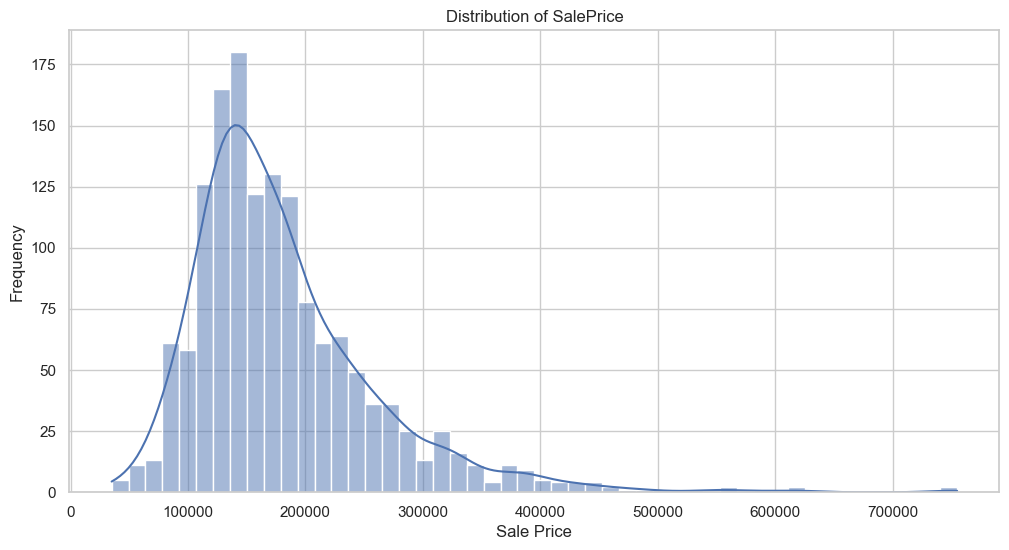

In [5]:
plt.figure(figsize=(12, 6))
sns.histplot(data['SalePrice'], kde=True, bins=50)
plt.title('Distribution of SalePrice')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

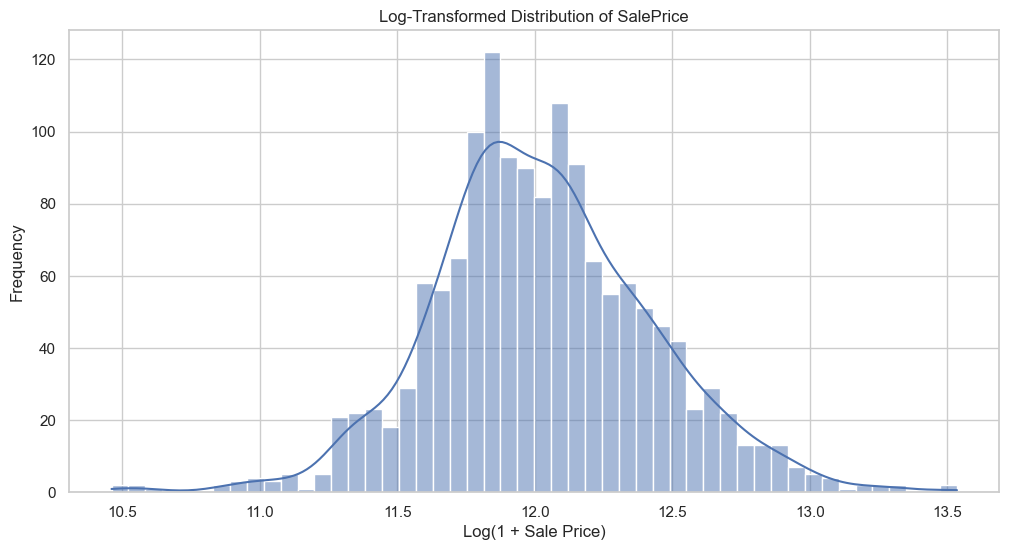

In [5]:
# The distribution is right-skewed. A log transformation can help normalize it,
# which often improves the performance of linear models.
plt.figure(figsize=(12, 6))
sns.histplot(np.log1p(data['SalePrice']), kde=True, bins=50)
plt.title('Log-Transformed Distribution of SalePrice')
plt.xlabel('Log(1 + Sale Price)')
plt.ylabel('Frequency')
plt.show()

### Interpretation of SalePrice Distribution

#### Technical Insights 📊
* **Right Skew**: The first histogram clearly shows a **positive (right) skew**. The bulk of the data is concentrated on the left side (lower prices), with a long tail to the right representing a smaller number of very expensive houses. Skewed target variables can sometimes violate the assumptions of certain models (especially linear models), leading to poorer performance.
* **Normalization**: The second histogram, after applying a `log(1+x)` transformation, is much more symmetrical and resembles a **normal distribution** (a "bell curve"). This transformed version is often easier for machine learning algorithms to model accurately, as it stabilizes the variance and reduces the impact of outliers. We will likely train our model to predict the log of the price and then convert the prediction back to the original scale.

#### Business Insights 💰
* The skewed distribution is a classic representation of a real estate market: most homes fall within a common price range, while a few high-end luxury properties create the tail.
* By using a log transformation, we're essentially telling our model to focus on the **percent change** in price rather than the absolute dollar change. This means the model will treat the difference between a \\$50k and \\$100k house with the same importance as the difference between a \\$500k and \\$1M house. This often aligns better with how value is perceived in the market.

## 4. Feature Analysis

We'll separate our features into numerical and categorical types to analyze them appropriately.

In [7]:
# Identify numerical and categorical features
numerical_features = data.select_dtypes(include=np.number).columns.tolist()
categorical_features = data.select_dtypes(exclude=np.number).columns.tolist()

# Remove the target variable and ID from the numerical features list
# as they are not predictor features.
numerical_features.remove('SalePrice')
numerical_features.remove('Id')

print(f"Total features: {len(data.columns)}")
print(f"Numerical features: {len(numerical_features)}")
print(f"Categorical features: {len(categorical_features)}")

Total features: 81
Numerical features: 36
Categorical features: 43


### Interpretation of Feature Split

#### Technical Insights ⚙️
* **Separation of Concerns**: We've programmatically identified **36 numerical** and **43 categorical** features. This is a foundational step in exploratory data analysis. It allows us to apply the correct analysis techniques to each group—for example, calculating correlations for numerical data and frequency counts for categorical data.

### 4.1 Numerical Feature Correlation

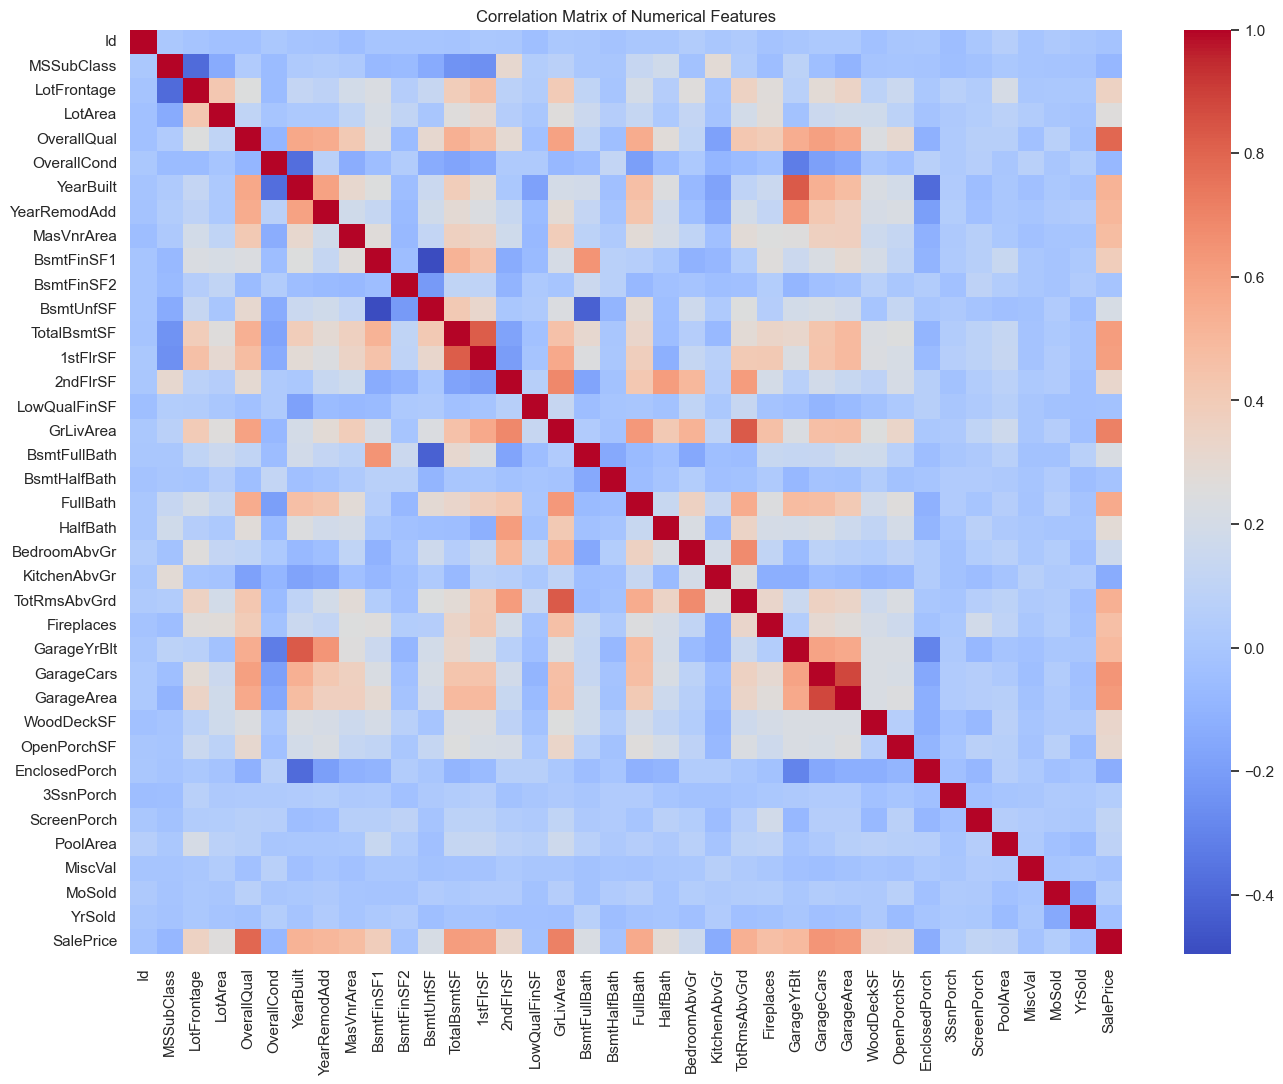

In [8]:
# Calculate the correlation matrix
correlation_matrix = data.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [9]:
# Let's look at the features most correlated with SalePrice
print("Top 10 features most correlated with SalePrice:")
top_corr_features = correlation_matrix.nlargest(11, 'SalePrice')['SalePrice'].index
print(correlation_matrix.nlargest(11, 'SalePrice')['SalePrice'])

Top 10 features most correlated with SalePrice:
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


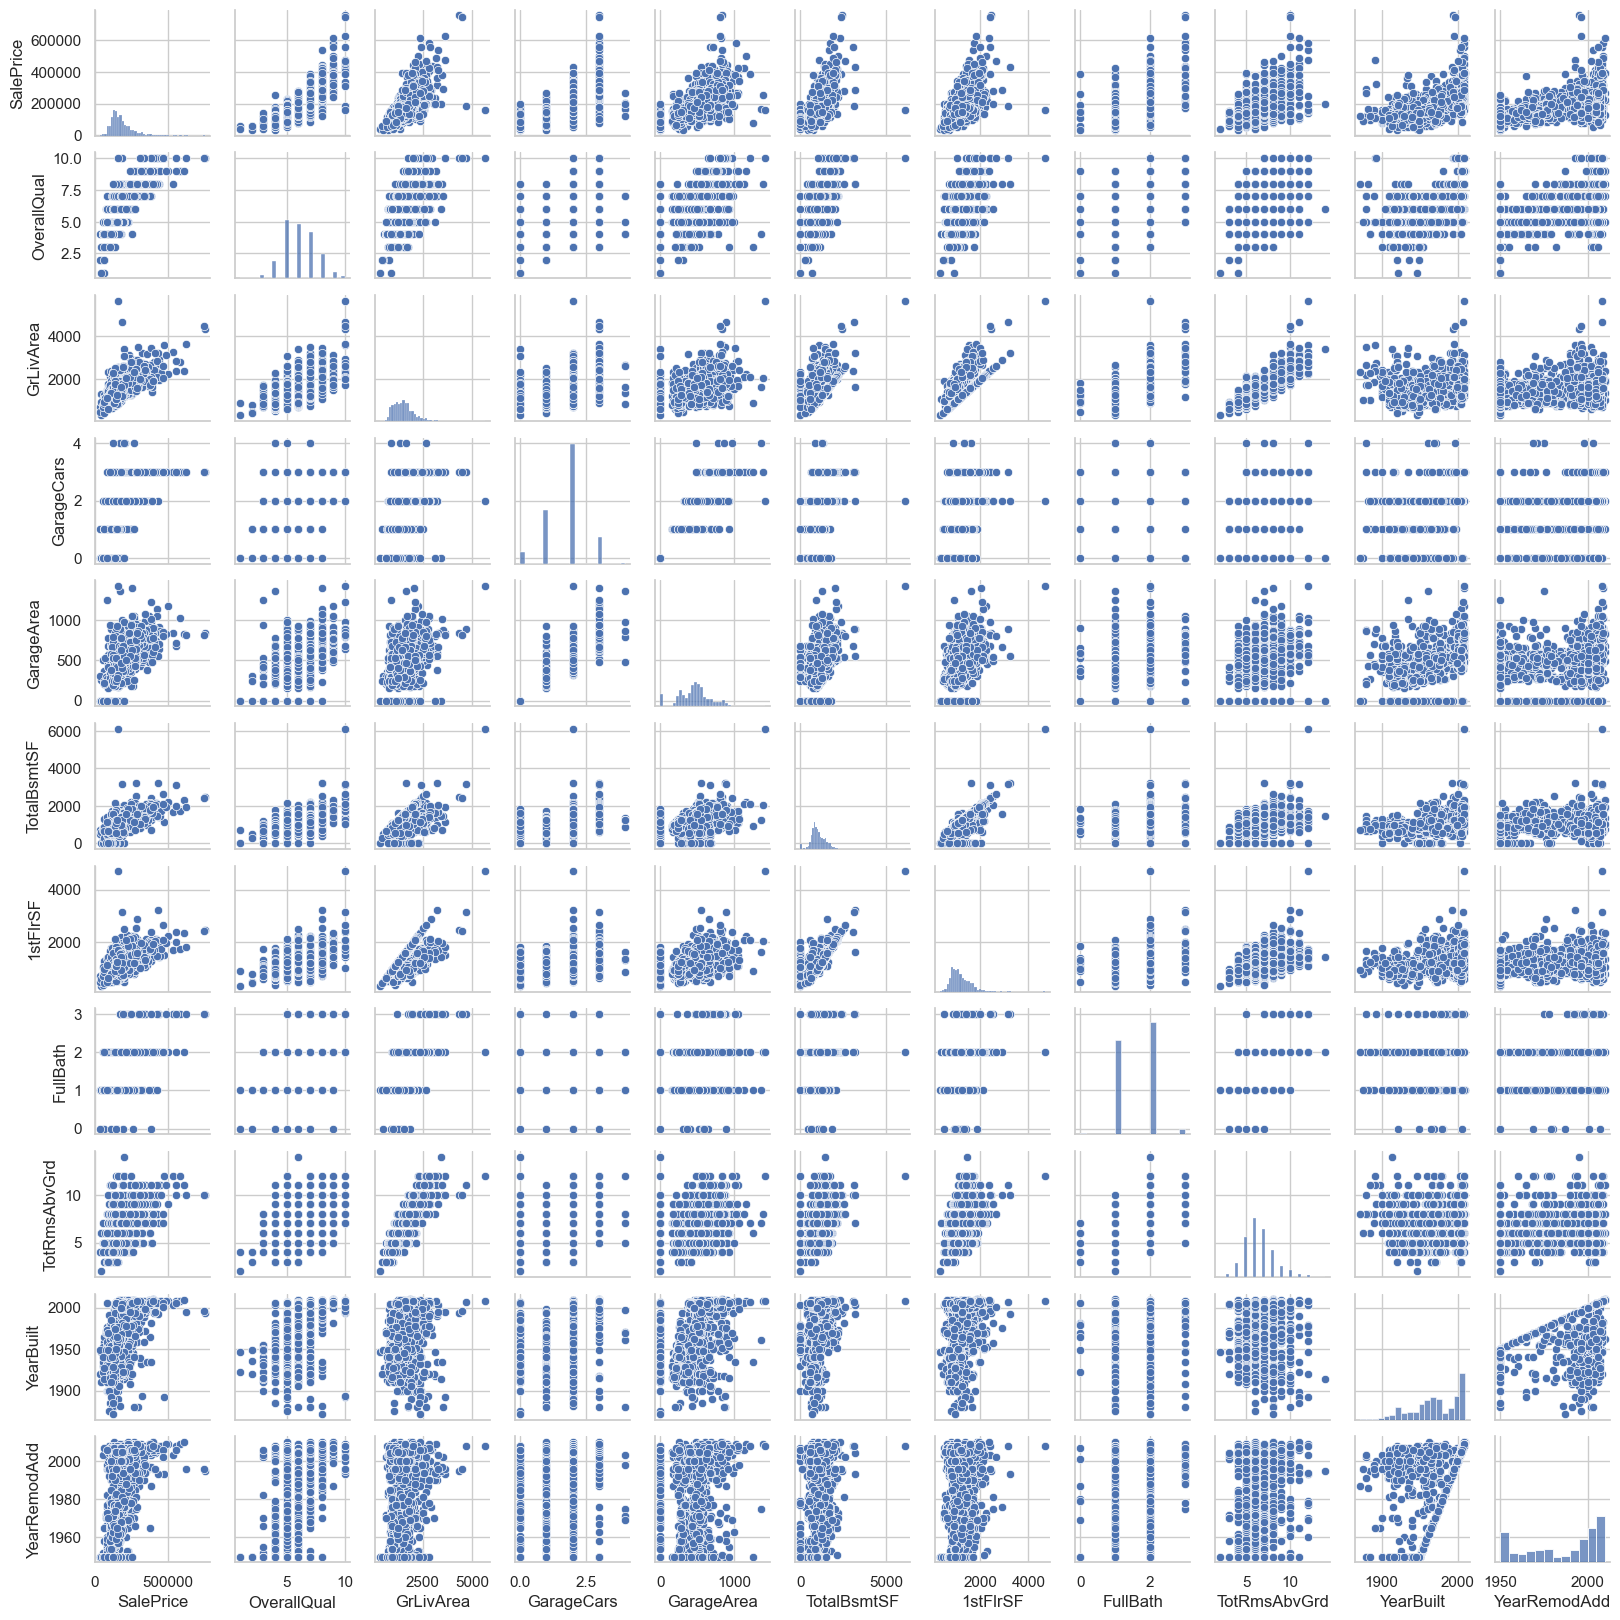

In [10]:
# Pairplot of the top correlated features
sns.pairplot(data[top_corr_features], height=1.5)
plt.show()

### Interpretation of Correlation Analysis

#### Technical Insights 📈
* **Strong Positive Correlations**: The heatmap and the sorted list clearly show that `OverallQual` (Overall Quality) and `GrLivArea` (Above Grade Living Area) have the strongest positive correlations with `SalePrice` (0.79 and 0.71, respectively). This is a strong signal that these features will be very important for our model.
* **Multicollinearity**: We can spot potential **multicollinearity** (when predictor variables are correlated with each other). For example, `GarageCars` and `GarageArea` are highly correlated (0.88). This makes sense, as a larger garage fits more cars. Similarly, `TotalBsmtSF` and `1stFlrSF` are also highly correlated. For some models, this can be an issue, but tree-based models like XGBoost are generally robust to it.
* **Linear Relationships**: The scatter plots in the `pairplot` show roughly linear relationships between the top features and `SalePrice`. For instance, as `GrLivArea` increases, `SalePrice` tends to increase in a straight-line fashion. This confirms that these are good predictors.

#### Business Insights 🏠
* **Quality is Key**: The top predictor, `OverallQual`, tells us that the perceived quality of a house is the single most important driver of its price, even more so than just its size.
* **Size Matters**: Living area (`GrLivArea`), garage size (`GarageArea`), and basement size (`TotalBsmtSF`) are all in the top 6. This confirms the common real estate wisdom that a bigger house generally sells for more.
* **Modern Features are Valued**: `YearBuilt` and `YearRemodAdd` also show a moderate positive correlation, indicating that newer or recently remodeled homes command higher prices.

### 4.2 Handling Missing Values

Missing data can cause errors or lead to biased models. We need to identify which columns have missing values and decide on a strategy for handling them.

In [12]:
# Calculate the percentage of missing values for each column
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
missing_data = pd.DataFrame({'Missing Count': missing_values, 'Percentage': missing_percentage})

# Filter for columns with missing data and sort them
missing_data = missing_data[missing_data['Percentage'] > 0].sort_values(by='Percentage', ascending=False)

print("Features with missing values:")
display(missing_data)

Features with missing values:


,Missing Count,Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


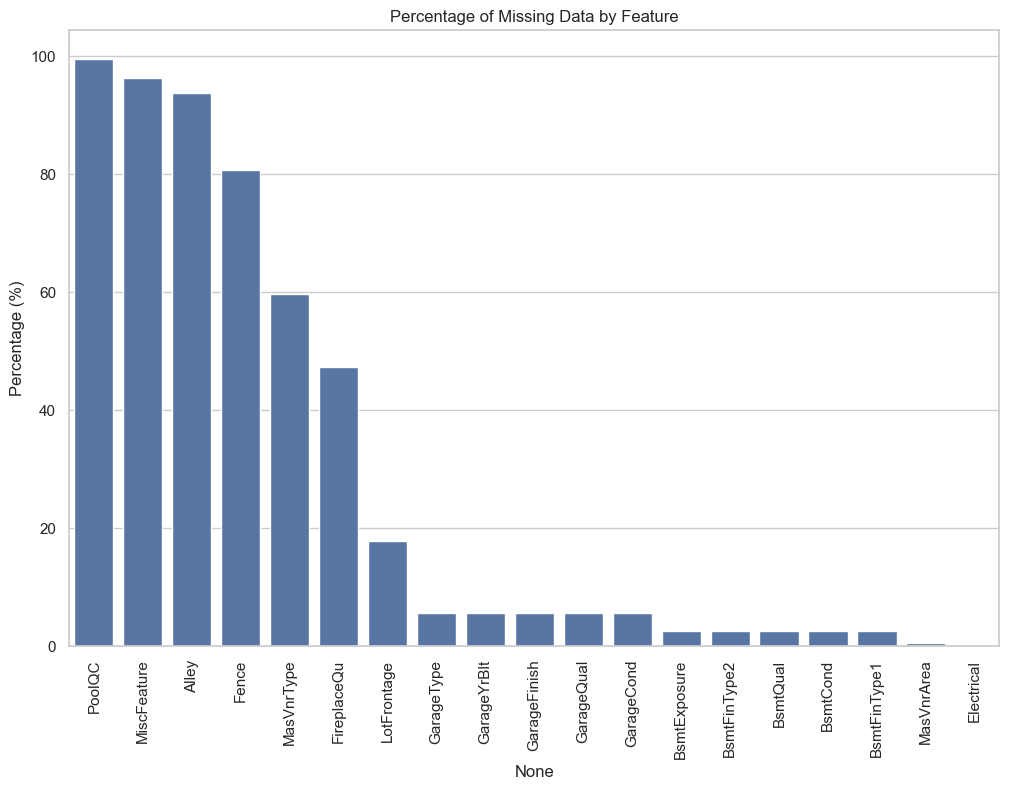

In [14]:
# Visualize the missing data
if not missing_data.empty:
    plt.figure(figsize=(12, 8))
    sns.barplot(x=missing_data.index, y=missing_data['Percentage'])
    plt.xticks(rotation=90)
    plt.title('Percentage of Missing Data by Feature')
    plt.ylabel('Percentage (%)')
    plt.show()

### Interpretation of Missing Values

#### Technical Insights 🧐
* **Severity**: We have features with very high percentages of missing data. `PoolQC` is missing 99.5% of its values, followed by `MiscFeature` (96.3%), `Alley` (93.8%), and `Fence` (80.7%).
* **Groupings**: Notice that many of the missing values occur in related groups. For example, the `GarageType`, `GarageYrBlt`, `GarageFinish`, `GarageQual`, and `GarageCond` columns all have exactly 81 missing values. The same pattern appears for many of the `Bsmt` (basement) features.

#### Business Insights 📝
* **"Missing" vs. "Not Applicable"**: This is the key insight. By checking the `data_description.txt`, we can infer that a missing value in `PoolQC` doesn't mean the data is bad; it means the house **does not have a pool**. The same logic applies to `Alley`, `Fence`, `FireplaceQu`, and `Garage` features. This is not missing data, but rather meaningful information that we can encode (for example, by filling the `NaN` with the string 'None').
* **Imputation Strategy**:
    * For features where `NA` means "not present" (like `PoolQC`, `Alley`, `Fence`, `FireplaceQu`, `Garage` features, `Bsmt` features), we will fill the missing values with 'None' or 0.
    * For `LotFrontage`, the missing values are likely genuine gaps. A good strategy would be to **impute** them, perhaps using the median `LotFrontage` of the house's neighborhood.
    * For features with only a tiny number of missing values (like `Electrical`), we can safely fill them with the **mode** (the most common value).

**Important**: We will perform these filling/imputation steps in our Python scripts, not in this notebook. The purpose of EDA is to decide on the strategy.

### 4.3 Feature Engineering

Feature engineering is the process of creating new, more predictive features from the existing ones. This can often lead to significant improvements in model performance.

In [15]:
# Example 1: Total square footage of the house
data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']

# Example 2: Age of the house at the time of sale
data['HouseAge'] = data['YrSold'] - data['YearBuilt']

# Example 3: Binary feature indicating if the house was ever remodeled
data['WasRemodeled'] = (data['YearRemodAdd'] != data['YearBuilt']).astype(int)

# Let's see how these new features correlate with SalePrice
new_features_corr = data[['TotalSF', 'HouseAge', 'WasRemodeled', 'SalePrice']].corr(numeric_only=True)
print("Correlation of new features with SalePrice:")
display(new_features_corr['SalePrice'])

Correlation of new features with SalePrice:


TotalSF         0.782260
HouseAge       -0.523350
WasRemodeled   -0.021933
SalePrice       1.000000
Name: SalePrice, dtype: float64

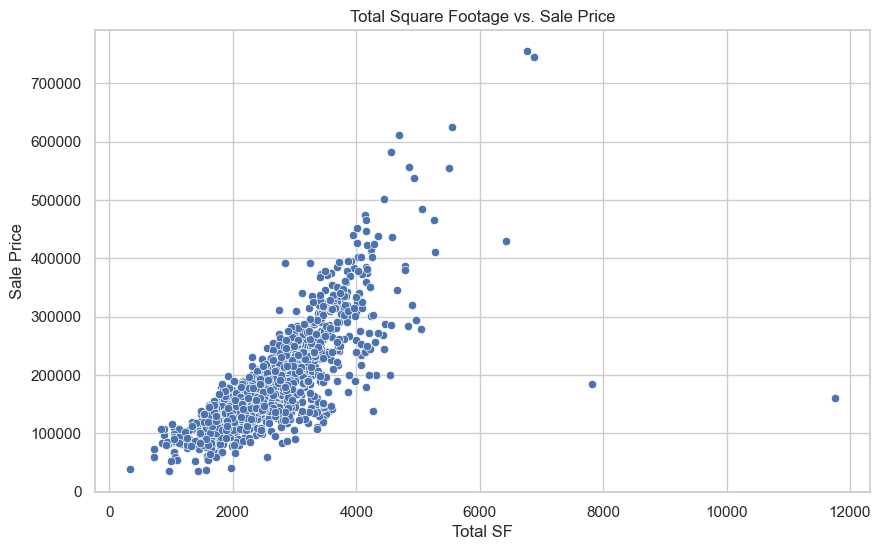

In [16]:
# Visualize the relationship of TotalSF with SalePrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['TotalSF'], y=data['SalePrice'])
plt.title('Total Square Footage vs. Sale Price')
plt.xlabel('Total SF')
plt.ylabel('Sale Price')
plt.show()

### Interpretation of Engineered Features

#### Technical Insights 🛠️
* **Stronger Signal**: Our new `TotalSF` feature has a correlation of **0.78** with `SalePrice`. This is higher than any of the individual square footage features (`TotalBsmtSF`, `1stFlrSF`, `2ndFlrSF`), indicating that we've successfully combined them into a more powerful, consolidated signal for the model.
* **Clear Negative Trend**: The `HouseAge` feature shows a strong negative correlation of **-0.52**. The scatter plot (if we were to plot it) would show a clear downward trend, confirming that as age increases, price decreases. This is a valuable feature.
* **Visual Confirmation**: The scatter plot of `TotalSF` vs. `SalePrice` shows a very clear positive linear relationship, much like the one we saw with `GrLivArea`.

#### Business Insights 📈
* **Holistic Value**: `TotalSF` better represents the overall size and utility of a house from a buyer's perspective than just the above-ground living area. It confirms that buyers value all usable space, including a well-finished basement.
* **Age & Renovation Premium**: The correlations for `HouseAge` and `WasRemodeled` quantify the market's preference for newer and updated homes. A remodeled older home will fetch a higher price than a non-remodeled one of the same age, and our model will now be able to capture that nuance.